In [85]:
import pandas as pd 
import numpy as np 
import missingno as msno

In [108]:

# Read the CSV with the specified columns
df_cmg = pd.read_csv(r'../data/cmg_historico/cmg_crucero.csv')
df_vert = df_cmg.copy()
df_vert['fecha_hora'] = pd.to_datetime(df_vert['fecha_hora'])
df_vert

,fecha,anio,mes,dia,hora,barra,tension,valor,fecha_hora
0,01/01/2018,2018,1,1,1,CRUCERO_______220,220,55.800,2018-01-01 00:00:00
1,01/01/2018,2018,1,1,2,CRUCERO_______220,220,55.800,2018-01-01 01:00:00
2,01/01/2018,2018,1,1,3,CRUCERO_______220,220,55.800,2018-01-01 02:00:00
3,01/01/2018,2018,1,1,4,CRUCERO_______220,220,55.800,2018-01-01 03:00:00
4,01/01/2018,2018,1,1,5,CRUCERO_______220,220,55.800,2018-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
58256,31/10/2024,2024,10,31,18,CRUCERO_______220,220,0.000,2024-10-31 17:00:00
58257,31/10/2024,2024,10,31,20,CRUCERO_______220,220,70.267,2024-10-31 19:00:00
58258,31/10/2024,2024,10,31,21,CRUCERO_______220,220,72.521,2024-10-31 20:00:00
58259,31/10/2024,2024,10,31,23,CRUCERO_______220,220,66.588,2024-10-31 22:00:00


In [44]:
df_vert.describe()

,anio,mes,dia,hora,tension,valor,fecha_hora
count,58261.000000,58261.000000,58261.000000,58261.000000,58261.0,58261.000000,58261
mean,2020.840837,6.332761,15.706322,12.495683,220.0,63.861511,2021-04-29 05:25:23.825543680
min,2018.000000,1.000000,1.000000,1.000000,220.0,0.000000,2018-01-01 00:00:00
25%,2019.000000,3.000000,8.000000,6.000000,220.0,33.090000,2019-08-30 21:00:00
50%,2021.000000,6.000000,16.000000,12.000000,220.0,49.900000,2021-04-28 18:00:00
75%,2022.000000,9.000000,23.000000,19.000000,220.0,79.720000,2022-12-26 15:00:00
max,2024.000000,12.000000,31.000000,24.000000,220.0,480.600000,2024-10-31 23:00:00
std,1.925853,3.419291,8.800007,6.938292,0.0,55.445001,NaN


In [45]:
df_vert['vertimiento'] = (df_vert['valor'] == 0).astype(int)
df_vert

,fecha,anio,mes,dia,hora,barra,tension,valor,fecha_hora,vertimiento
0,01/01/2018,2018,1,1,1,CRUCERO_______220,220,55.800,2018-01-01 00:00:00,0
1,01/01/2018,2018,1,1,2,CRUCERO_______220,220,55.800,2018-01-01 01:00:00,0
2,01/01/2018,2018,1,1,3,CRUCERO_______220,220,55.800,2018-01-01 02:00:00,0
3,01/01/2018,2018,1,1,4,CRUCERO_______220,220,55.800,2018-01-01 03:00:00,0
4,01/01/2018,2018,1,1,5,CRUCERO_______220,220,55.800,2018-01-01 04:00:00,0
...,...,...,...,...,...,...,...,...,...,...
58256,31/10/2024,2024,10,31,18,CRUCERO_______220,220,0.000,2024-10-31 17:00:00,1
58257,31/10/2024,2024,10,31,20,CRUCERO_______220,220,70.267,2024-10-31 19:00:00,0
58258,31/10/2024,2024,10,31,21,CRUCERO_______220,220,72.521,2024-10-31 20:00:00,0
58259,31/10/2024,2024,10,31,23,CRUCERO_______220,220,66.588,2024-10-31 22:00:00,0


In [46]:
df_vert.columns

Index(['fecha', 'anio', 'mes', 'dia', 'hora', 'barra', 'tension', 'valor',
       'fecha_hora', 'vertimiento'],
      dtype='object')

In [47]:
df_vert.drop(columns=['fecha', 'anio', 'mes', 'dia', 'hora', 'barra', 'tension', 'valor'], inplace=True)
df_vert

,fecha_hora,vertimiento
0,2018-01-01 00:00:00,0
1,2018-01-01 01:00:00,0
2,2018-01-01 02:00:00,0
3,2018-01-01 03:00:00,0
4,2018-01-01 04:00:00,0
...,...,...
58256,2024-10-31 17:00:00,1
58257,2024-10-31 19:00:00,0
58258,2024-10-31 20:00:00,0
58259,2024-10-31 22:00:00,0


In [48]:
df_vert.to_csv(r'../data/etl/vertimientos.csv', index=False)

In [63]:
## Importamos generación real

df_agg_gx = pd.read_csv(r'../data/etl/agg_gx.csv')
df_agg_gx['fecha_hora'] = pd.to_datetime(df_agg_gx['fecha_hora'])
df_agg_gx.rename(columns={'SUM(gx.generacion)':'gx'},inplace=True)
df_agg_gx = df_agg_gx[df_agg_gx['region_nombre']!='Magallanes y de la Antártica Chilena']
df_agg_gx

,fecha_hora,tipo_central_nombre,region_nombre,gx
0,2019-01-01 00:00:00,Eólicas,Biobío,57.09
1,2019-01-01 01:00:00,Eólicas,Biobío,58.19
2,2019-01-01 02:00:00,Eólicas,Biobío,48.44
3,2019-01-01 03:00:00,Eólicas,Biobío,39.39
4,2019-01-01 04:00:00,Eólicas,Biobío,41.75
...,...,...,...,...
997250,2024-11-16 01:00:00,Solares,Los Ríos,0.00
997251,2024-11-16 02:00:00,Solares,Los Ríos,0.00
997252,2024-11-16 03:00:00,Solares,Los Ríos,0.00
997253,2024-11-16 04:00:00,Solares,Los Ríos,0.00


In [64]:
df_agg_gx = pd.merge(df_agg_gx,df_vert, how='left', on='fecha_hora')
df_agg_gx.dropna(inplace=True)
df_agg_gx['vertimiento'] = df_agg_gx['vertimiento'].astype(int)
df_agg_gx

,fecha_hora,tipo_central_nombre,region_nombre,gx,vertimiento
0,2019-01-01 00:00:00,Eólicas,Biobío,57.09,0
1,2019-01-01 01:00:00,Eólicas,Biobío,58.19,0
2,2019-01-01 02:00:00,Eólicas,Biobío,48.44,0
3,2019-01-01 03:00:00,Eólicas,Biobío,39.39,0
4,2019-01-01 04:00:00,Eólicas,Biobío,41.75,0
...,...,...,...,...,...
960740,2024-10-31 17:00:00,Solares,Los Ríos,2.13,1
960742,2024-10-31 19:00:00,Solares,Los Ríos,0.26,0
960743,2024-10-31 20:00:00,Solares,Los Ríos,0.02,0
960745,2024-10-31 22:00:00,Solares,Los Ríos,0.00,0


In [66]:
## Importamos GX estimada para casos de vertimiento

df_agg_gx_est = pd.read_csv(r'../data/etl/agg_erv_gx_estimation.csv')
df_agg_gx_est.rename(columns={'date_local': 'fecha_hora'}, inplace=True)
df_agg_gx_est['fecha_hora'] = pd.to_datetime(df_agg_gx_est['fecha_hora'])
df_agg_gx_est

,fecha_hora,tipo_central_nombre,region_nombre,est_gx
0,2015-12-31 20:00:00,Eólicas,Antofagasta,7.907752
1,2015-12-31 20:00:00,Eólicas,Biobío,3.062239
2,2015-12-31 20:00:00,Eólicas,Coquimbo,12.511826
3,2015-12-31 20:00:00,Eólicas,Los Lagos,0.000000
4,2015-12-31 20:00:00,Eólicas,O’Higgins,0.000000
...,...,...,...,...
1336662,2024-05-03 14:00:00,Solares,Maule,1.548610
1336663,2024-05-03 14:00:00,Solares,Metropolitana,14.571610
1336664,2024-05-03 14:00:00,Solares,O’Higgins,17.869820
1336665,2024-05-03 14:00:00,Solares,Valparaíso,13.104076


In [67]:
df_agg_gx_combined = pd.merge(df_agg_gx, df_agg_gx_est, how='left', on=['fecha_hora', 'tipo_central_nombre', 'region_nombre'])
df_agg_gx_combined['augmented_gx'] = np.where(
    df_agg_gx_combined['vertimiento'] == 1, 
    np.maximum(df_agg_gx_combined['est_gx'], df_agg_gx_combined['gx']), 
    df_agg_gx_combined['gx']
)

df_agg_gx_combined['pivot'] = 'gx_'+df_agg_gx_combined['tipo_central_nombre'] + '_' + df_agg_gx_combined['region_nombre']

df_agg_gx_combined.drop(columns=['gx', 'est_gx', 'vertimiento','tipo_central_nombre','region_nombre'], inplace=True)


df_agg_gx_combined

,fecha_hora,augmented_gx,pivot
0,2019-01-01 00:00:00,57.09,gx_Eólicas_Biobío
1,2019-01-01 01:00:00,58.19,gx_Eólicas_Biobío
2,2019-01-01 02:00:00,48.44,gx_Eólicas_Biobío
3,2019-01-01 03:00:00,39.39,gx_Eólicas_Biobío
4,2019-01-01 04:00:00,41.75,gx_Eólicas_Biobío
...,...,...,...
889866,2024-10-31 17:00:00,NaN,gx_Solares_Los Ríos
889867,2024-10-31 19:00:00,0.26,gx_Solares_Los Ríos
889868,2024-10-31 20:00:00,0.02,gx_Solares_Los Ríos
889869,2024-10-31 22:00:00,0.00,gx_Solares_Los Ríos


In [71]:
## Pivoteamos GX

df_gx_pivoted = df_agg_gx_combined.pivot(index='fecha_hora',columns='pivot', values='augmented_gx')

df_gx_pivoted = df_gx_pivoted.fillna(0)
df_gx_pivoted = df_gx_pivoted.reset_index('fecha_hora')
df_gx_pivoted['fecha_hora'] = pd.to_datetime(df_gx_pivoted['fecha_hora'])
df_gx_pivoted


pivot,fecha_hora,gx_Eólicas_Antofagasta,gx_Eólicas_Araucanía,gx_Eólicas_Atacama,gx_Eólicas_Biobío,gx_Eólicas_Coquimbo,gx_Eólicas_Los Lagos,gx_Eólicas_O’Higgins,gx_Solares_Antofagasta,gx_Solares_Araucanía,...,gx_Solares_Atacama,gx_Solares_Biobío,gx_Solares_Coquimbo,gx_Solares_Los Ríos,gx_Solares_Maule,gx_Solares_Metropolitana,gx_Solares_O’Higgins,gx_Solares_Tarapacá,gx_Solares_Valparaíso,gx_Solares_Ñuble
0,2019-01-01 00:00:00,89.92,71.65,26.40,57.09,459.92,26.54,3.03,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1,2019-01-01 01:00:00,72.62,79.50,10.70,58.19,388.12,22.47,1.76,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,2019-01-01 02:00:00,35.16,77.97,1.90,48.44,304.78,13.95,0.65,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
3,2019-01-01 03:00:00,17.75,66.52,0.00,39.39,252.67,13.50,1.51,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
4,2019-01-01 04:00:00,8.89,51.07,0.00,41.75,278.55,15.77,3.25,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49487,2024-10-31 17:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
49488,2024-10-31 19:00:00,682.22,322.78,4.99,271.44,3.40,33.00,20.87,295.99,1.70,...,302.80,5.87,54.1,0.26,51.22,60.44,48.18,8.4,39.66,9.09
49489,2024-10-31 20:00:00,614.20,258.34,5.71,361.47,8.27,82.06,22.07,7.14,0.02,...,0.05,0.14,0.1,0.02,1.64,0.11,0.11,0.0,0.03,0.11
49490,2024-10-31 22:00:00,149.74,396.97,11.01,315.47,30.07,91.30,6.51,0.00,0.00,...,0.00,0.00,0.0,0.00,0.01,0.00,0.00,0.0,0.00,0.00


In [109]:
df_cmg = df_cmg[['fecha_hora','valor']].copy()
df_cmg['fecha_hora'] = pd.to_datetime(df_cmg['fecha_hora'])
df_cmg.rename(columns={'valor':'cmg'}, inplace=True)
df_cmg

,fecha_hora,cmg
0,2018-01-01 00:00:00,55.800
1,2018-01-01 01:00:00,55.800
2,2018-01-01 02:00:00,55.800
3,2018-01-01 03:00:00,55.800
4,2018-01-01 04:00:00,55.800
...,...,...
58256,2024-10-31 17:00:00,0.000
58257,2024-10-31 19:00:00,70.267
58258,2024-10-31 20:00:00,72.521
58259,2024-10-31 22:00:00,66.588


In [110]:
df_dda = pd.read_csv(r'../data/etl/df_dda.csv')
df_dda.rename(columns={'fechahora':'fecha_hora'}, inplace=True)
df_dda['fecha_hora'] = pd.to_datetime(df_dda['fecha_hora'])
df_dda

,fecha_hora,demanda
0,2024-06-28 00:00:00,9829.046875
1,2024-06-28 01:00:00,9293.071289
2,2024-06-28 02:00:00,9054.050781
3,2024-06-28 03:00:00,8898.201172
4,2024-06-28 04:00:00,8838.200195
...,...,...
53266,2024-06-26 19:00:00,11299.368190
53267,2024-06-20 12:00:00,10343.069138
53268,2024-06-20 18:00:00,11215.710800
53269,2024-06-24 14:00:00,11724.375452


In [119]:
df_cotas = pd.read_csv(r'../data/etl/cotas_embalses.tsv', sep='\t') 

df_cotas['hora'] = df_cotas['hora']-1
df_cotas = df_cotas[df_cotas['hora']!=24]
df_cotas['fecha_hora'] = pd.to_datetime(df_cotas['fecha'].astype(str) + " " + df_cotas['hora'].astype(str),format='%Y-%m-%d %H')

df_cotas = df_cotas[['fecha_hora','nombre_embalse','cota']]
df_cotas['nombre_embalse'] = "emb_" + df_cotas['nombre_embalse']

df_cotas = df_cotas.pivot(index='fecha_hora', columns='nombre_embalse', values='cota')
df_cotas.reset_index(inplace=True)
# df_cotas.drop(columns=['nombre_embalse'], inplace=True)

df_cotas

nombre_embalse,fecha_hora,emb_ANGOSTURA,emb_CHAPO,emb_COLBUN,emb_INVERNADA,emb_LAJA,emb_MACHICURA,emb_MAULE,emb_MELADO,emb_PANGUE,emb_POLCURA,emb_RALCO,emb_RAPEL
0,2018-01-01 00:00:00,"316,38","234,66","434,94","1317,15","1322,41","256,53","2160,27","645,06","508,89","734,76","721,5","104,57"
1,2018-01-01 01:00:00,"316,37","234,66","434,94","1317,15","1322,41","256,46","2160,27","645,18","508,89","734,76","721,49","104,57"
2,2018-01-01 02:00:00,"316,38","234,65","434,94","1317,15","1322,41","256,42","2160,27","645,32","508,89","734,74","721,48","104,58"
3,2018-01-01 03:00:00,"316,42","234,65","434,94","1317,15","1322,41","256,37","2160,27","645,44","508,82","734,73","721,49","104,58"
4,2018-01-01 04:00:00,"316,47","234,64","434,92","1317,15","1322,41","256,3","2160,27","645,57","508,68","734,71","721,51","104,59"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59912,2024-11-01 09:00:00,"316,99","238,62","435,34","1307,97","1333,38","256,47","2167,47","648,7","510,0","731,87","724,97","104,21"
59913,2024-11-01 10:00:00,"316,99","238,62","435,35","1308,0","1333,38","256,45","2167,47","648,71","509,95","731,84","724,95","104,22"
59914,2024-11-01 11:00:00,"317,0","238,63","435,36","1308,04","1333,38","256,45","2167,47","648,7","509,88","731,78","724,94","104,23"
59915,2024-11-01 12:00:00,"317,0","238,62","435,38","1308,07","1333,38","256,48","2167,47","648,67","509,87","731,77","724,94","104,25"


In [133]:
df_inst = pd.read_csv(r'../data/etl/df_pot_inst_acumulado_sen.csv')
df_inst.rename(columns={'fecha':'fecha_hora'}, inplace=True)
df_inst['fecha_hora'] = df_inst['fecha_hora'] + " 00:00:00"
df_inst['fecha_hora'] = pd.to_datetime(df_inst['fecha_hora'])
df_inst

,fecha_hora,inst_eolicas_antofagasta,inst_eolicas_araucania,inst_eolicas_atacama,inst_eolicas_biobio,inst_eolicas_coquimbo,inst_eolicas_los lagos,inst_eolicas_magallanes y de la antartica chilena,inst_eolicas_o'higgins,inst_geotermica_antofagasta,...,inst_termoelectricas_coquimbo,inst_termoelectricas_los lagos,inst_termoelectricas_los rios,inst_termoelectricas_magallanes y de la antartica chilena,inst_termoelectricas_maule,inst_termoelectricas_metropolitana,inst_termoelectricas_nuble,inst_termoelectricas_o'higgins,inst_termoelectricas_tarapaca,inst_termoelectricas_valparaiso
0,1909-07-01,0.0000,0.0000,0.000,0.0000,0.000,0.00,0.0,0.0000,0.00,...,0.0000,0.000,0.000,0.00,0.0000,0.00000,0.00000,0.0000,0.0000,0.0
1,1919-01-01,0.0000,0.0000,0.000,0.0000,0.000,0.00,0.0,0.0000,0.00,...,0.0000,0.000,0.000,0.00,0.0000,0.00000,0.00000,0.0000,0.0000,0.0
2,1923-07-01,0.0000,0.0000,0.000,0.0000,0.000,0.00,0.0,0.0000,0.00,...,0.0000,0.000,0.000,0.00,0.0000,0.00000,0.00000,0.0000,0.0000,0.0
3,1926-07-01,0.0000,0.0000,0.000,0.0000,0.000,0.00,0.0,0.0000,0.00,...,0.0000,0.000,0.000,0.00,0.0000,0.00000,0.00000,0.0000,0.0000,0.0
4,1930-07-01,0.0000,0.0000,0.000,0.0000,0.000,0.00,0.0,0.0000,0.00,...,0.0000,0.000,0.000,0.00,0.0000,0.00000,0.00000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2024-08-01,982.9818,913.0834,1116.892,629.2407,694.572,390.07,0.0,142.2191,94.88,...,686.9098,238.598,181.373,100.74,232.8928,518.46725,92.94758,60.1821,67.7525,2104.6
233,2024-09-01,982.9818,913.0834,1116.892,629.2407,694.572,390.07,0.0,142.2191,94.88,...,686.9098,238.598,181.373,100.74,232.8928,518.46725,92.94758,60.1821,67.7525,2104.6
234,2024-10-01,982.9818,913.0834,1116.892,629.2407,694.572,390.07,0.0,142.2191,94.88,...,686.9098,238.598,181.373,100.74,232.8928,518.46725,92.94758,60.1821,67.7525,2104.6
235,2024-11-01,982.9818,913.0834,1116.892,629.2407,694.572,390.07,0.0,142.2191,94.88,...,686.9098,238.598,181.373,100.74,232.8928,518.46725,92.94758,60.1821,67.7525,2104.6


In [134]:
df_ssee = pd.read_csv(r'../data/etl/df_ssee_acumulado.csv')
df_ssee.rename(columns={'fecha':'fecha_hora'}, inplace=True)
df_ssee['fecha_hora'] = df_ssee['fecha_hora'] + " 00:00:00"
df_ssee['fecha_hora'] = pd.to_datetime(df_ssee['fecha_hora'], format='%Y-%m-%d %H:%M:%S')
df_ssee

,fecha_hora,ssee_antofagasta,ssee_araucania,ssee_arica y parinacota,ssee_atacama,ssee_biobio,ssee_coquimbo,ssee_los lagos,ssee_los rios,ssee_magallanes y de la antartica chilena,ssee_maule,ssee_metropolitana,ssee_nuble,ssee_o'higgins,ssee_tarapaca,ssee_valparaiso
0,1899-12-01,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.0,0.000,798.000,0.000,0.000,0.00,0.000
1,1905-05-01,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.0,0.000,798.000,0.000,0.000,0.00,2.000
2,1911-01-01,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.0,0.000,798.000,0.000,36.000,0.00,2.000
3,1914-01-01,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.0,0.000,798.000,0.000,193.500,0.00,2.000
4,1915-05-01,284.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.0,0.000,798.000,0.000,193.500,0.00,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2024-07-01,27355.261,2593.32,486.025,12430.42,11708.245,6693.412,2668.67,1306.571,207.4,5693.013,20175.887,1810.654,5524.366,2708.49,9116.177
285,2024-08-01,27355.261,2743.32,486.025,12430.42,11708.245,6783.412,2668.67,1306.571,207.4,5751.013,20175.887,1810.654,5524.366,2708.49,9116.177
286,2024-09-01,27355.261,2743.32,486.025,12430.42,11708.245,6783.412,2848.67,1306.571,207.4,5751.013,20175.887,1810.654,5524.366,2708.49,9116.177
287,2024-10-01,27355.261,2743.32,486.025,12430.42,11708.245,6783.412,2848.67,1306.571,207.4,5751.013,20175.887,1810.654,5524.366,2708.49,9116.177


In [135]:
df_lat = pd.read_csv(r'../data/etl/df_lat_acumulado.csv')
df_lat.rename(columns={'fecha':'fecha_hora'}, inplace=True)
df_lat['fecha_hora'] = df_lat['fecha_hora'] + " 00:00:00"
df_lat['fecha_hora'] = pd.to_datetime(df_lat['fecha_hora'], format='%Y-%m-%d %H:%M:%S')


df_lat

,fecha_hora,lat_100,lat_110,lat_154,lat_220,lat_345,lat_500
0,1922-01-01,0.000,73.65176,0.00000,0.00000,0.0,0.0000
1,1923-01-01,0.000,106.49150,0.00000,0.00000,0.0,0.0000
2,1928-01-01,0.000,193.33838,0.00000,0.00000,0.0,0.0000
3,1946-01-01,0.000,323.53844,0.00000,0.00000,0.0,0.0000
4,1947-01-01,0.000,357.76382,0.00000,0.00000,0.0,0.0000
...,...,...,...,...,...,...,...
234,2024-07-01,63.883,5810.58402,1267.72139,20201.03356,190.3,4778.8035
235,2024-08-01,63.883,5810.64582,1267.72139,20213.40386,190.3,4778.8035
236,2024-09-01,63.883,5829.26204,1267.72139,20303.56386,190.3,4778.8035
237,2024-10-01,63.883,5845.51259,1267.72139,20303.64350,190.3,4778.8035


In [152]:
df_final = pd.DataFrame()

df_final = pd.merge(df_cmg,df_dda, how='left', on='fecha_hora')
df_final

,fecha_hora,cmg,demanda
0,2018-01-01 00:00:00,55.800,NaN
1,2018-01-01 01:00:00,55.800,NaN
2,2018-01-01 02:00:00,55.800,NaN
3,2018-01-01 03:00:00,55.800,NaN
4,2018-01-01 04:00:00,55.800,NaN
...,...,...,...
58256,2024-10-31 17:00:00,0.000,NaN
58257,2024-10-31 19:00:00,70.267,NaN
58258,2024-10-31 20:00:00,72.521,NaN
58259,2024-10-31 22:00:00,66.588,NaN


In [153]:
df_final = pd.merge(df_final,df_gx_pivoted, how='left', on='fecha_hora')
df_final = pd.merge(df_final,df_inst, how='left', on='fecha_hora')
df_final = pd.merge(df_final,df_ssee, how='left', on='fecha_hora')
df_final = pd.merge(df_final,df_lat, how='left', on='fecha_hora')
df_final = pd.merge(df_final,df_cotas, how='left', on='fecha_hora')
df_final

,fecha_hora,cmg,demanda,gx_Eólicas_Antofagasta,gx_Eólicas_Araucanía,gx_Eólicas_Atacama,gx_Eólicas_Biobío,gx_Eólicas_Coquimbo,gx_Eólicas_Los Lagos,gx_Eólicas_O’Higgins,...,emb_COLBUN,emb_INVERNADA,emb_LAJA,emb_MACHICURA,emb_MAULE,emb_MELADO,emb_PANGUE,emb_POLCURA,emb_RALCO,emb_RAPEL
0,2018-01-01 00:00:00,55.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"434,94","1317,15","1322,41","256,53","2160,27","645,06","508,89","734,76","721,5","104,57"
1,2018-01-01 01:00:00,55.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"434,94","1317,15","1322,41","256,46","2160,27","645,18","508,89","734,76","721,49","104,57"
2,2018-01-01 02:00:00,55.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"434,94","1317,15","1322,41","256,42","2160,27","645,32","508,89","734,74","721,48","104,58"
3,2018-01-01 03:00:00,55.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"434,94","1317,15","1322,41","256,37","2160,27","645,44","508,82","734,73","721,49","104,58"
4,2018-01-01 04:00:00,55.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"434,92","1317,15","1322,41","256,3","2160,27","645,57","508,68","734,71","721,51","104,59"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58256,2024-10-31 17:00:00,0.000,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"435,01","1307,44","1333,27","256,78","2167,45","648,36","509,91","731,56","724,96","104,2"
58257,2024-10-31 19:00:00,70.267,NaN,682.22,322.78,4.99,271.44,3.40,33.00,20.87,...,"435,06","1307,5","1333,27","256,88","2167,45","648,37","509,87","731,98","724,96","104,22"
58258,2024-10-31 20:00:00,72.521,NaN,614.20,258.34,5.71,361.47,8.27,82.06,22.07,...,"435,08","1307,53","1333,27","256,93","2167,45","648,34","509,86","731,75","724,95","104,21"
58259,2024-10-31 22:00:00,66.588,NaN,149.74,396.97,11.01,315.47,30.07,91.30,6.51,...,"435,11","1307,58","1333,27","256,88","2167,45","648,31","509,88","731,58","724,96","104,2"


<Axes: >

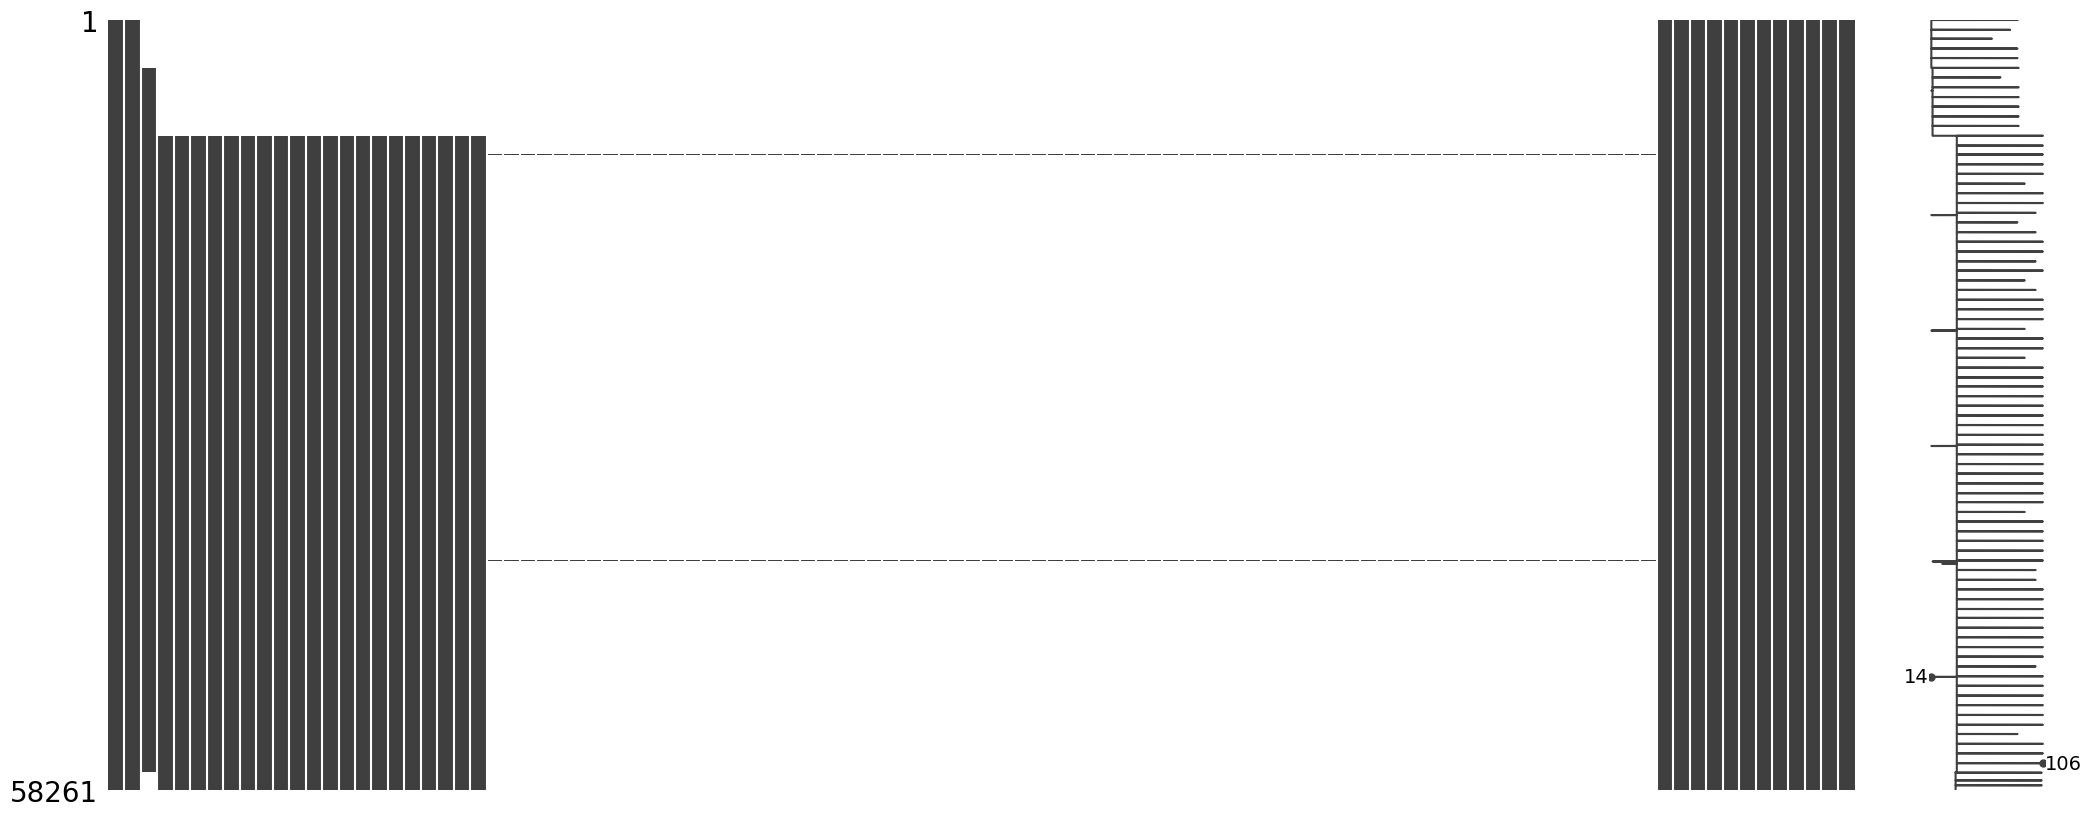

In [154]:
msno.matrix(df_final)

In [155]:
df_final.iloc[:,3:] = df_final.iloc[:,3:].ffill()

<Axes: >

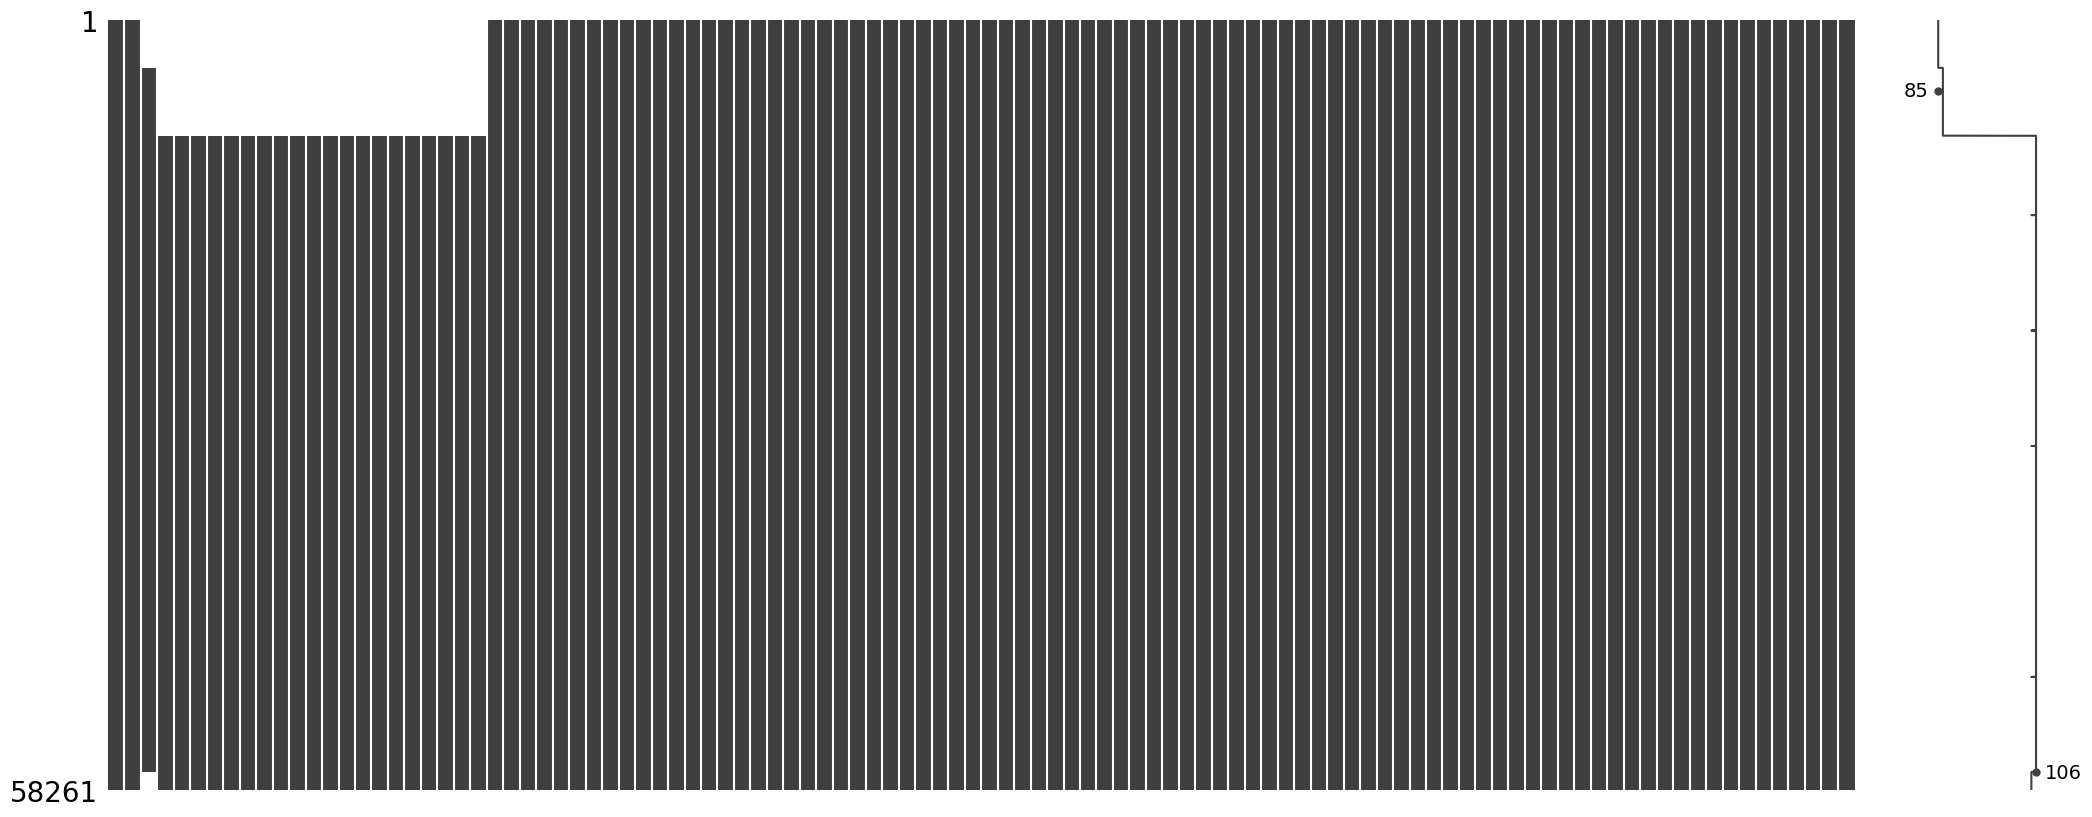

In [156]:
msno.matrix(df_final)

In [157]:
df_final.dropna(inplace=True)
df_final

,fecha_hora,cmg,demanda,gx_Eólicas_Antofagasta,gx_Eólicas_Araucanía,gx_Eólicas_Atacama,gx_Eólicas_Biobío,gx_Eólicas_Coquimbo,gx_Eólicas_Los Lagos,gx_Eólicas_O’Higgins,...,emb_COLBUN,emb_INVERNADA,emb_LAJA,emb_MACHICURA,emb_MAULE,emb_MELADO,emb_PANGUE,emb_POLCURA,emb_RALCO,emb_RAPEL
8760,2019-01-01 00:00:00,55.52,7992.914520,89.92,71.65,26.40,57.09,459.92,26.54,3.03,...,"434,08","1317,56","1327,24","256,99","2162,65","643,47","509,02","735,55","715,75","103,52"
8761,2019-01-01 01:00:00,55.52,7948.664819,72.62,79.50,10.70,58.19,388.12,22.47,1.76,...,"434,08","1317,5","1327,24","256,92","2162,65","643,63","508,9","735,57","715,75","103,52"
8762,2019-01-01 02:00:00,55.52,7752.115956,35.16,77.97,1.90,48.44,304.78,13.95,0.65,...,"434,07","1317,51","1327,24","256,85","2162,65","643,79","508,81","735,6","715,73","103,52"
8763,2019-01-01 03:00:00,55.52,7523.577425,17.75,66.52,0.00,39.39,252.67,13.50,1.51,...,"434,06","1317,55","1327,24","256,78","2162,65","643,94","508,74","735,62","715,73","103,52"
8764,2019-01-01 04:00:00,55.52,7308.782546,8.89,51.07,0.00,41.75,278.55,15.77,3.25,...,"434,06","1317,52","1327,24","256,71","2162,65","644,08","508,75","735,62","715,73","103,52"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56895,2024-06-28 15:00:00,0.00,9228.687500,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"428,25","1306,16","1330,09","257,15","2166,86","645,91","508,77","735,03","721,98","104,52"
56896,2024-06-28 16:00:00,9.03,9903.786133,474.64,262.98,127.24,288.62,286.39,5.97,36.77,...,"428,22","1306,16","1330,09","257,16","2166,86","645,92","508,71","735,07","722,04","104,53"
56897,2024-06-28 17:00:00,35.36,10463.607422,494.72,477.75,74.94,317.90,178.76,6.89,69.48,...,"428,23","1306,18","1330,09","257,17","2166,86","645,83","508,72","734,94","722,07","104,5"
56898,2024-06-28 18:00:00,69.48,10986.050781,303.65,654.46,28.13,365.90,85.30,2.12,71.48,...,"428,23","1306,16","1330,09","257,16","2166,86","645,78","508,71","734,92","722,07","104,51"


In [158]:
df_final.to_csv(r'../data/df_final.csv', index=False)